<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Financial_Forecasting_in_the_Finance_Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib statsmodels


<ipython-input-2-5c60908d0e21>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2020-01-01', periods=36, freq='M')


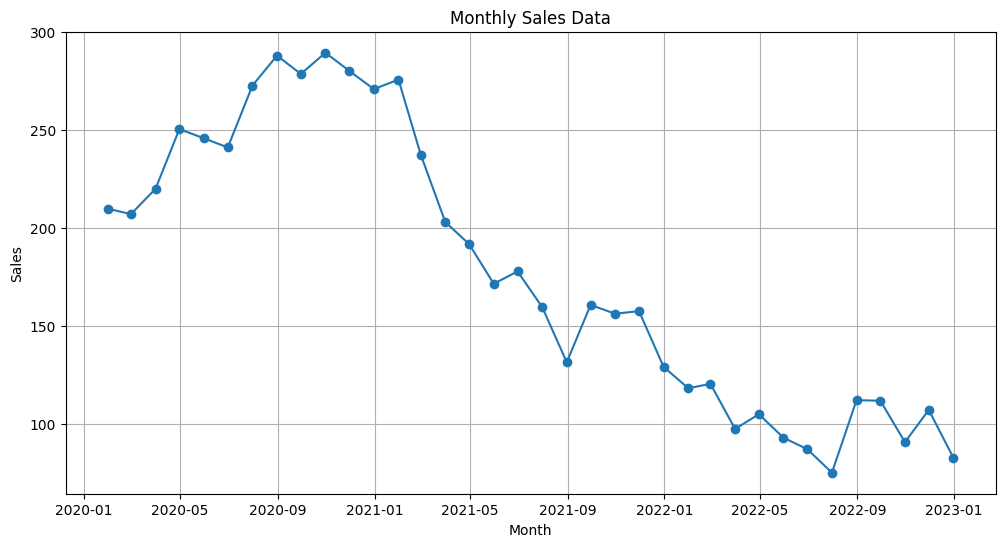

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


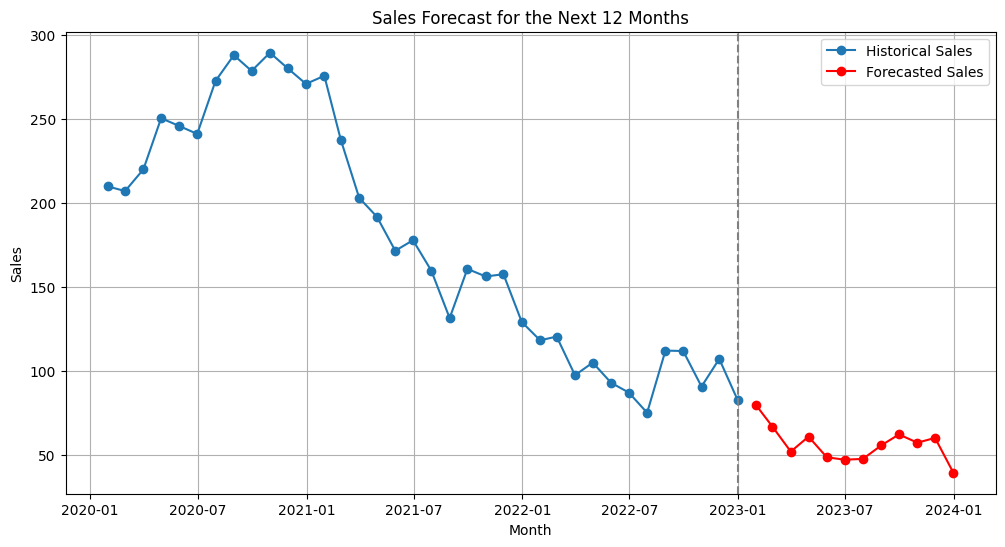

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generating a sample dataset
# Monthly sales data for 36 months (3 years)
np.random.seed(42)  # For reproducibility
months = pd.date_range(start='2020-01-01', periods=36, freq='M')
sales = 200 + np.random.normal(0, 20, size=len(months)).cumsum()  # Cumulative sum to simulate growth
data = pd.DataFrame({'Month': months, 'Sales': sales})

# Set the month as the index
data.set_index('Month', inplace=True)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(data, marker='o')
plt.title('Monthly Sales Data')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
plt.show()

# Applying Exponential Smoothing for forecasting
model = ExponentialSmoothing(data['Sales'], trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

# Making forecasts for the next 12 months
forecast = fit_model.forecast(steps=12)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(data, marker='o', label='Historical Sales')
plt.plot(forecast.index, forecast, marker='o', color='red', label='Forecasted Sales')
plt.title('Sales Forecast for the Next 12 Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.axvline(x=data.index[-1], color='grey', linestyle='--')  # Line to separate historical and forecast
plt.legend()
plt.grid()
plt.show()
